<a href="https://colab.research.google.com/github/educhel/L03_Data_Analysis/blob/main/0112_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [1] 실전! 데이터 실습 (4)

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
import pandas as pd

titanic = pd.read_csv('/content/drive/MyDrive/새싹2기/데이터분석/data/titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [105]:
titanic.shape

(891, 15)

In [106]:
titanic.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,object
who,object


## (1) 생존 여부(survived)의 구성 비율을 확인하기 위해 생존자 / 사망자 수를 파이 차트로 표시하세요.

<Axes: ylabel='survived'>

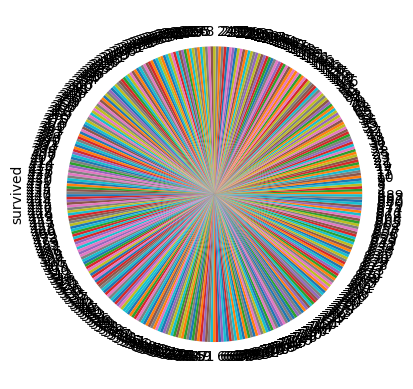

In [107]:
# 잘못된 예시
# titanic['survived'] -> 0/1 (int) -> 일단은 그릴 수 있다.
# 각 행마다의 0, 1의 파이차트
titanic['survived'].plot.pie()

# 의도한 바가 아님!

In [108]:
# 파이차트의 목적

# 구성 비율 -> 전체 = 원 -> 조각이 얼마나 차지하는지

# step1 : 분석 가능한 형태로 제작
# -> titanic['survived']의 구성 요소 별 빈도
s_vc = titanic['survived'].value_counts()
s_vc

,count
survived,
0,549
1,342


<Axes: ylabel='count'>

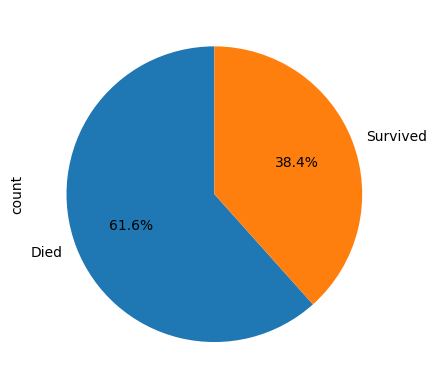

In [109]:
# step2: 그래프 표시

s_vc.plot.pie(labels = ['Died','Survived'],
              # 내부 파라미터는 그래프를 더 잘 이해할 수 있도록 표현하는 방식
              # 필수는 아님
              autopct="%1.1f%%",
              startangle=90)

## (2) 객실 등급(class)별 승객 수를 집계하여 막대 그래프로 표시하세요.


In [110]:
# 막대그래프의 목적 -> 비교
# step1 : 그릴 수 있는 형태로 제작

c_vc = titanic['class'].value_counts()
c_vc

,count
class,
Third,491
First,216
Second,184


<Axes: ylabel='class'>

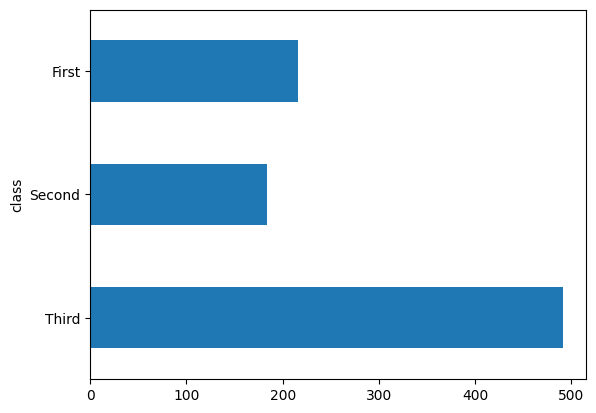

In [111]:
# step2 : 집계된 등급별 승객 수를 "막대그래프를 통해" 비교
c_vc.reindex(['Third','Second','First']).plot.barh()

## (3) 승객의 나이(age) 분포를 확인하기 위해 히스토그램으로 표시하세요.

In [112]:
# 분석 대상 = age 컬럼은?
# float -> 수치형 자료

# 히스토그램의 목적 : 단일 변수 분포 확인

# step1: 분석 대상 제작
# 바로 계산 가능한 형태
titanic['age']

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


<Axes: ylabel='Frequency'>

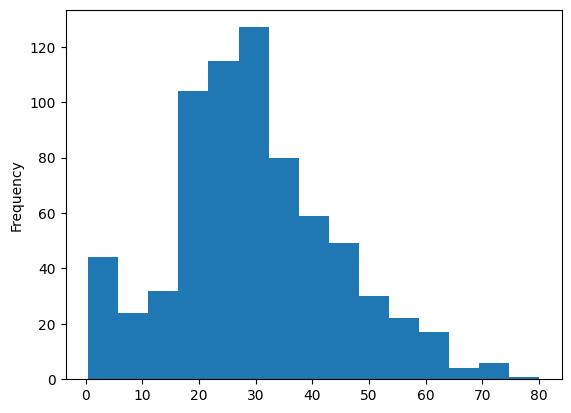

In [113]:
titanic['age'].plot.hist(bins=15)

# [2] 실전! 데이터 실습(5)

### (1) 데이터 확인하기

In [114]:
# 방법 1: 불러오기단에서 처리하기
tips = pd.read_csv("/content/drive/MyDrive/새싹2기/데이터분석/data/preprocess_tips.csv",
                   index_col=0)

In [115]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
53,9.94,1.56,Male,False,Sun,Dinner Dinner,2
148,9.78,NaN,Male,False,Thur,Lunch Lunch,2
43,9.68,1.32,NaN,False,Sun,Dinner Dinner,2
178,9.60,4.00,FEMALE,Yes,Sun,Dinner Dinner,2
30,9.55,1.45,Male,False,Sat,Dinner Dinner,2


In [116]:
# 방법 2:그냥 불러온 후에 처리하기
tips = pd.read_csv("/content/drive/MyDrive/새싹2기/데이터분석/data/preprocess_tips.csv")

In [117]:
tips.columns[0]

'Unnamed: 0'

In [118]:
tips.drop(tips.columns[0], axis=1, inplace=True)

# 똑같다.
# tips.drop(columns=tips.columns[0])

In [119]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,9.94,1.56,Male,False,Sun,Dinner Dinner,2
1,9.78,NaN,Male,False,Thur,Lunch Lunch,2
2,9.68,1.32,NaN,False,Sun,Dinner Dinner,2
3,9.60,4.00,FEMALE,Yes,Sun,Dinner Dinner,2
4,9.55,1.45,Male,False,Sat,Dinner Dinner,2


In [120]:
tips.shape

(244, 7)

In [121]:
tips.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


In [122]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         220 non-null    float64
 2   sex         220 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### (2) 결측치 확인하고, 결측치를 처리하세요.

In [123]:
tips.isnull().sum()

# 10% 정도 해당

,0
total_bill,0
tip,24
sex,24
smoker,0
day,0
time,0
size,0


결측치 처리 전략
1. 제거
2. 대체
3. 유지

In [124]:
# 1. 제거
# 결측이 발생한 행 모두 제거
tips_clean = tips.dropna()
tips_clean.shape # 약 20%의 손실
# => 올바르다고 할 수 없다

(199, 7)

In [125]:
# 열 제거 불가
# 핵심 정보를 담고 있기 때문에
missing = tips.isnull().sum()
missing[missing>0]

,0
tip,24
sex,24


In [126]:
# 수치형
# 평균, 중앙값, 최빈값

tips['tip'].mean(), tips['tip'].median(), tips['tip'].mode()

(np.float64(3.0332272727272724),
 3.0,
 0    2.0
 Name: tip, dtype: float64)

In [127]:
tips['tip'].describe()

,tip
count,220.000000
mean,3.033227
std,1.418814
min,1.000000
25%,2.000000
50%,3.000000
75%,3.720000
max,10.000000


<Axes: ylabel='Frequency'>

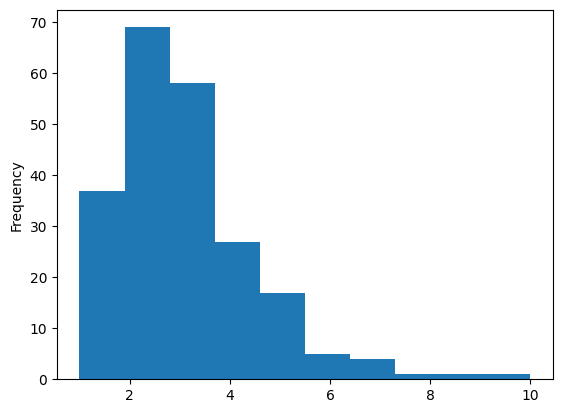

In [128]:
# 수치형 자료 이해 돕기 위한 시각화
# 단일 변수 분포

tips['tip'].plot.hist()

<Axes: xlabel='total_bill', ylabel='tip'>

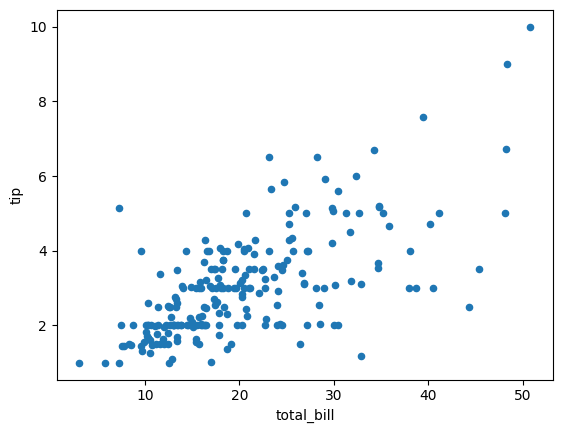

In [129]:
# 수치형 자료 간 (2개) 패턴 확인

tips.plot.scatter(x='total_bill',y='tip')

<Axes: ylabel='Frequency'>

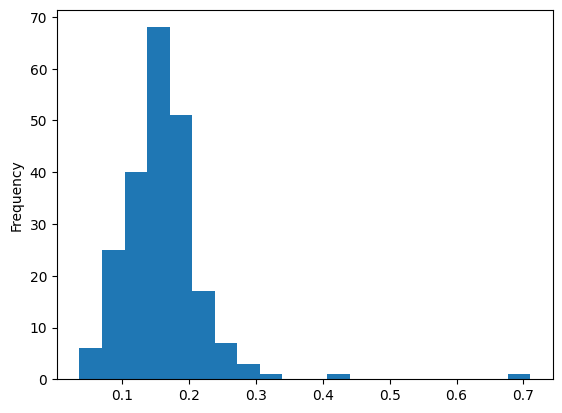

In [130]:
# 'tip' 결측치 대체
# fillna -> X

# 기반 지식 : 통상적으로 tip 영수 금액 -> 10~20% 의 비율로 낸다.

tips['tip_ratio'] = tips['tip'] / tips['total_bill']
tips['tip_ratio'].plot.hist(bins=20)

In [131]:
# 선택 -> 할당
tips.loc[tips['tip'].isnull(),'tip'] = tips.loc[tips['tip'].isnull(),'total_bill'] * 0.15

In [132]:
tips.isnull().sum()

,0
total_bill,0
tip,0
sex,24
smoker,0
day,0
time,0
size,0
tip_ratio,24


In [133]:
# 범주형
# 최빈값

tips['sex'].value_counts()

,count
sex,
Male,144
FEMALE,76


In [134]:
tips['sex'].value_counts(normalize=True)

,proportion
sex,
Male,0.654545
FEMALE,0.345455


In [135]:
tips['sex'].mode()

,sex
0,Male


In [136]:
type(tips['sex'].mode())

pandas.core.series.Series

In [138]:
# 대체 : 최빈값으로!

tips_clean = tips.fillna({'sex':tips['sex'].mode()[0]})

In [139]:
tips_clean

,total_bill,tip,sex,smoker,day,time,size,tip_ratio
0,9.94,1.5600,Male,False,Sun,Dinner Dinner,2,0.156942
1,9.78,1.4670,Male,False,Thur,Lunch Lunch,2,NaN
2,9.68,1.3200,Male,False,Sun,Dinner Dinner,2,0.136364
3,9.60,4.0000,FEMALE,Yes,Sun,Dinner Dinner,2,0.416667
4,9.55,1.4500,Male,False,Sat,Dinner Dinner,2,0.151832
...,...,...,...,...,...,...,...,...
239,10.29,2.6000,FEMALE,False,Sun,Dinner Dinner,2,0.252672
240,10.27,1.7100,Male,False,Sun,Dinner Dinner,2,0.166504
241,10.09,2.0000,FEMALE,Yes,Fri,Lunch Lunch,2,0.198216
242,10.07,1.8300,FEMALE,False,Thur,Lunch Lunch,1,0.181728
